In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as pylt
import numpy as np
import pylab as plt
import matplotlib.cm as matcm
import matplotlib.colors as colors
import sys
import os
sys.path.append('/home/cecere/Documentos/python_fomo')
from readfomo import readgoftcube, readgoftcubechianti, regulargoftcube, gaussfitgoftcube
import glob
import sunpy.visualization.colormaps as cm
import sunpy
from astropy.visualization import SqrtStretch, ImageNormalize


In [2]:
# store filenames as a sorted list
#unsorted=glob.glob('../example/example_FLASH/Afomo-hdf5-outputb.txt')
# Para uno
unsorted=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt')
# Para varios
#unsorted=glob.glob('/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t*.txt')
print(unsorted)
filelist=sorted(unsorted)
print(filelist)

['/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt']
['/home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt']


In [11]:
#f=open('/home/cecere/programas/fomo/fomo-c/example/example_loops/b2y280x2fC-171-t100.txt',"r")
#alllines=f.readlines()
#print(alllines[5])

In [3]:
print('Reading file',filelist[0])
data,chiantifile=readgoftcubechianti(filelist[0])
emiss,xvec,yvec,lvec=regulargoftcube(data)
allemiss=emiss

Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt


In [4]:
# create data cube from file list
print('Reading file',filelist[0])
data,chiantifile=readgoftcubechianti(filelist[0])
emiss,xvec,yvec,lvec=regulargoftcube(data)
allemiss=emiss
print(chiantifile)
#print(allemiss)
print(allemiss.ndim)
print(emiss.shape)
print(xvec.shape)
print(yvec.shape)
for filename in filelist[1:]:
    print('Reading file',filename)
    data=readgoftcube(filename)
    emiss,xvec,yvec,lvec=regulargoftcube(data)
    allemiss=np.dstack((allemiss,emiss))

Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-131-t0019.txt
/home/cecere/programas/fomo/chiantitables/goft_table_aia131_abco.dat

2
(350, 350)
(350,)
(350,)


In [5]:
print(allemiss.shape)

(350, 350)


In [6]:
# set colour map
cmap=matcm.hot
aiafilter=os.path.basename(chiantifile)
print(aiafilter)
if ('goft_table_aia094' in aiafilter): cmap=plt.get_cmap('sdoaia094')
if ('goft_table_aia131' in aiafilter): cmap=plt.get_cmap('sdoaia131')
if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('sdoaia171')
if ('goft_table_aia193' in aiafilter): cmap=plt.get_cmap('sdoaia193')
if ('goft_table_aia211' in aiafilter): cmap=plt.get_cmap('sdoaia211')
if ('goft_table_aia304' in aiafilter): cmap=plt.get_cmap('sdoaia304')
if ('goft_table_aia335' in aiafilter): cmap=plt.get_cmap('sdoaia335')
#if ('goft_table_aia171' in aiafilter): cmap=plt.get_cmap('hot')
#Estos valores de normalización son los necesarios para que la corona brille hasta una altura similar al filtro correspondiente
if ('goft_table_aia094' in aiafilter): norm=colors.LogNorm(1.5, 50)
if ('goft_table_aia131' in aiafilter): norm=colors.LogNorm(7, 1200)
#if ('goft_table_aia171' in aiafilter): norm=colors.LogNorm(10000, 1000000)#ImageNormalize(vmin=60000, vmax=1000000, stretch=SqrtStretch())
if ('goft_table_aia171' in aiafilter): norm=ImageNormalize(vmin=1, vmax=6000, stretch=SqrtStretch())
if ('goft_table_aia193' in aiafilter): norm=colors.LogNorm(1, 6000)
if ('goft_table_aia211' in aiafilter): norm=colors.LogNorm(1, 13000)
if ('goft_table_aia304' in aiafilter): norm=colors.LogNorm(0.5, 100)
if ('goft_table_aia335' in aiafilter): norm=colors.LogNorm(3.5, 1000)

goft_table_aia131_abco.dat



In [7]:
print(np.mean(allemiss))

130.18933139282123


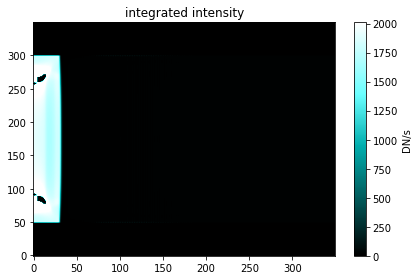

In [10]:
percent_emiss=99
fig, ax = plt.subplots()
im = ax.imshow(allemiss,cmap=cmap,aspect='auto',vmax=np.percentile(allemiss,percent_emiss),vmin=np.amin(allemiss),origin="lower")
#im = ax.imshow(allemiss[:,0:699,19],extent=(np.amin(xvec),np.amax(xvec),np.amin(yvec),np.amax(yvec)),cmap=cmap,aspect='auto',vmax=np.percentile(allemiss,percent_emiss),vmin=np.amin(allemiss),origin="lower")
#im = ax.imshow(allemiss[:,0:699,6],extent=(np.amin(xvec),np.amax(xvec),np.amin(yvec),np.amax(yvec)),cmap=cmap,aspect='auto',norm=norm,origin="lower")
#annotation=ax.annotate(format(0,'04d'),(.93,.97),textcoords='axes fraction',color='white')
plt.title('integrated intensity')
cb=plt.colorbar(im)
cb.set_label('DN/s')

plt.tight_layout()
plt.show()

Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0001.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0002.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0003.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0004.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0005.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0006.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0007.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0008.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0009.txt
Reading file /home/cecere/programas/fomo/fomo-c/example/example_loops/desequilibrio_5-171-t0010.txt


/tmp/ipykernel_14993/1286428572.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  annotation=ax.annotate(format(0,'04d'),(.93,.97),textcoords='axes fraction',color='white')
/tmp/ipykernel_14993/1286428572.py:12: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cb=plt.colorbar(im)


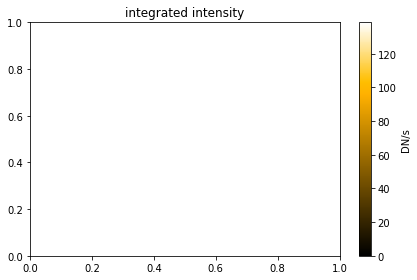

In [30]:
if len(filelist)>1:
    for filename in filelist[1:]:
        print('Reading file',filename)
        data=readgoftcube(filename)
        emiss,xvec,yvec,lvec=regulargoftcube(data)
        allemiss=np.dstack((allemiss,emiss))
        #print(allemiss.shape)
    im = ax.imshow(allemiss[:,::-1,0],extent=(np.amax(xvec),np.amin(xvec),np.amin(yvec),np.amax(yvec)),cmap=cmap,aspect='auto',origin='lower')
   # im = ax.imshow(allemiss[:,:,0],extent=(np.amin(xvec),np.amax(xvec),np.amin(yvec),np.amax(yvec)),cmap=cmap,aspect='auto',vmax=np.percentile(allemiss,percent_emiss),vmin=np.amin(allemiss),origin='lower')
    annotation=ax.annotate(format(0,'04d'),(.93,.97),textcoords='axes fraction',color='white')
    plt.title('integrated intensity')
    cb=plt.colorbar(im)
    cb.set_label('DN/s')

    plt.tight_layout()
    
    def init():
        return im,annotation

    def update_img(filename):
        im.set_data(allemiss[:,::-1,filename])
        annotation.set_text(format(filename,'04d'))
        return im,annotation

    # animate the frames
    dpi=300
    ani = animation.FuncAnimation(fig,update_img,frames=len(filelist),interval=30,blit=False,init_func=init)
    writer = animation.writers['ffmpeg'](fps=5)
    ani.save('desequilibrio_5_171.mp4',writer=writer,dpi=dpi)

else:
    #im = ax.imshow(allemiss[:,:],extent=(np.amin(xvec),np.amax(xvec),np.amin(yvec),np.amax(yvec)),origin='lower',cmap=cmap,aspect='auto',norm=colors.LogNorm(0.1, np.percentile(allemiss,percent_emiss))
    im = ax.imshow(allemiss[:,::-1],extent=(np.amax(xvec),np.amin(xvec),np.amin(yvec),np.amax(yvec)),cmap=cmap,aspect='auto',norm=norm,origin='lower')
    annotation=ax.annotate(format(0,'04d'),(.93,.97),textcoords='axes fraction', fontsize='xx-large', color='white')
    #plt.title('integrated intensity')
    cb=plt.colorbar(im)
    cb.set_label('DN/s')
    #plt.savefig('CHObs-304.svg',dpi=300)
    plt.tight_layout()
    pylt.show()  #############


In [15]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
Z = (Z1 - Z2) * 2

In [69]:
print(Z.ndim)
print(Z.shape)

2
(240, 240)


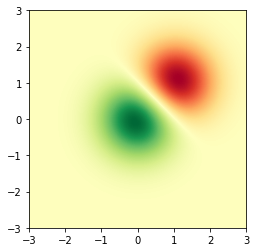

In [72]:
fig, ax = plt.subplots()
im = ax.imshow(Z, interpolation='bilinear', cmap=cm.RdYlGn,
               origin='lower', extent=[-3, 3, -3, 3],
               vmax=abs(Z).max(), vmin=-abs(Z).max())


In [73]:
plt.show()